In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load match related data

In [2]:
df_2019 = pd.read_csv("data/afl_results_2019.csv")
print(df_2019.shape)
df_2020 = pd.read_csv("data/afl_results_2020.csv")
print(df_2020.shape)
df_2021 = pd.read_csv("data/afl_results_2021.csv")
print(df_2021.shape)
df_2022 = pd.read_csv("data/afl_results_2022.csv")
print(df_2022.shape)

df_all = pd.concat([df_2019, df_2020, df_2021, df_2022], axis=0)
print(df_all.shape)
df_all.columns

(207, 75)
(162, 75)
(207, 75)
(5, 75)
(581, 75)


Index(['match.name', 'match.date', 'match.status', 'match.matchId',
       'match.venue', 'match.utcStartTime', 'match.homeTeamId',
       'match.awayTeamId', 'match.round', 'match.venueLocalStartTime',
       'match.abbr', 'match.twitterHashTag', 'match.homeTeam.name',
       'match.homeTeam.timeZone', 'match.homeTeam.teamId',
       'match.homeTeam.abbr', 'match.homeTeam.nickname', 'match.awayTeam.name',
       'match.awayTeam.timeZone', 'match.awayTeam.teamId',
       'match.awayTeam.abbr', 'match.awayTeam.nickname', 'venue.address',
       'venue.name', 'venue.state', 'venue.timeZone', 'venue.venueId',
       'venue.abbreviation', 'venue.capacity', 'venue.groundDimension',
       'venue.latitude', 'venue.longitude', 'round.name', 'round.year',
       'round.roundId', 'round.abbreviation', 'round.competitionId',
       'round.roundNumber', 'status', 'matchId', 'scoreWorm', 'scoreMap',
       'lastUpdated', 'homeTeamScore.periodScore',
       'homeTeamScore.rushedBehinds', 'homeTeamS

In [3]:
df_fixture = pd.read_csv("data/fixture_2022.csv")
print(df_fixture.shape)
df_fixture.columns

df_test = df_fixture[(df_fixture['status'] != "CONCLUDED") & (df_fixture['round.roundNumber'] == 1)]
df_test.head()

(198, 54)


,id,providerId,utcStartTime,status,compSeason.id,compSeason.providerId,compSeason.name,compSeason.shortName,compSeason.currentRoundNumber,round.id,...,away.score.superGoals,venue.id,venue.providerId,venue.name,venue.abbreviation,venue.location,venue.state,venue.timezone,metadata.ticket_link,compSeason.year
4,3812,CD_M20220140105,2022-03-19T06:10:00.000+0000,POSTGAME,43,CD_S2022014,2022 Toyota AFL Premiership,Premiership,1,588,...,0.0,10,CD_V9,Accor Stadium,ASA,Sydney,NSW,Australia/Sydney,https://premier.ticketek.com.au/shows/Show.asp...,2022
5,3813,CD_M20220140106,2022-03-19T09:10:00.000+0000,LIVE,43,CD_S2022014,2022 Toyota AFL Premiership,Premiership,1,588,...,NaN,22,CD_V20,Gabba,G,Brisbane,QLD,Australia/Brisbane,https://www.ticketmaster.com.au/event/13005C47...,2022
6,3814,CD_M20220140107,2022-03-20T02:10:00.000+0000,UNCONFIRMED_TEAMS,43,CD_S2022014,2022 Toyota AFL Premiership,Premiership,1,588,...,NaN,13,CD_V40,MCG,MCG,Melbourne,VIC,Australia/Melbourne,https://premier.ticketek.com.au/shows/show.asp...,2022
7,3815,CD_M20220140108,2022-03-20T05:10:00.000+0000,UNCONFIRMED_TEAMS,43,CD_S2022014,2022 Toyota AFL Premiership,Premiership,1,588,...,NaN,31,CD_V6,Adelaide Oval,AO,Adelaide,SA,Australia/Adelaide,https://premier.ticketek.com.au/shows/show.asp...,2022
8,3816,CD_M20220140109,2022-03-20T08:40:00.000+0000,UNCONFIRMED_TEAMS,43,CD_S2022014,2022 Toyota AFL Premiership,Premiership,1,588,...,NaN,65,CD_V2925,Optus Stadium,OS,Perth,WA,Australia/Perth,https://www.ticketmaster.com.au/afl,2022


In [4]:
# Remove finals Rounds 24, 25, 26, 26

#df_all = df_all[~df_all['round.roundNumber'].isin([24,25,26,27])]


In [5]:
df_all.shape

(581, 75)

In [6]:
df_all.sort_values('match.date', inplace=True)
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [7]:
df_all.tail()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,homeTeamScoreChart.rightPosters,homeTeamScoreChart.rushedBehinds,homeTeamScoreChart.touchedBehinds,awayTeamScoreChart.goals,awayTeamScoreChart.leftBehinds,awayTeamScoreChart.rightBehinds,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds
576,Melbourne Vs Western Bulldogs,2022-03-16 08:10:00,CONCLUDED,CD_M20220140101,CD_V40,2022-03-16T08:10:00,CD_T90,CD_T140,CD_R202201401,2022-03-16T19:10:00,...,1,2,0,11,2,2,0,0,1,0
577,Carlton Vs Richmond,2022-03-17 08:25:00,CONCLUDED,CD_M20220140102,CD_V40,2022-03-17T08:25:00,CD_T30,CD_T120,CD_R202201401,2022-03-17T19:25:00,...,0,1,0,11,3,5,0,0,2,0
578,St Kilda Vs Collingwood,2022-03-18 08:50:00,CONCLUDED,CD_M20220140103,CD_V190,2022-03-18T08:50:00,CD_T130,CD_T40,CD_R202201401,2022-03-18T19:50:00,...,0,2,0,15,5,3,2,1,1,0
579,Geelong Cats Vs Essendon,2022-03-19 03:10:00,CONCLUDED,CD_M20220140104,CD_V40,2022-03-19T03:10:00,CD_T70,CD_T50,CD_R202201401,2022-03-19T14:10:00,...,1,6,0,11,3,1,0,0,2,0
580,GWS Giants Vs Sydney Swans,2022-03-19 06:10:00,CONCLUDED,CD_M20220140105,CD_V9,2022-03-19T06:10:00,CD_T1010,CD_T160,CD_R202201401,2022-03-19T17:10:00,...,1,3,0,17,2,4,0,0,4,0


In [8]:
from pandas.plotting import scatter_matrix

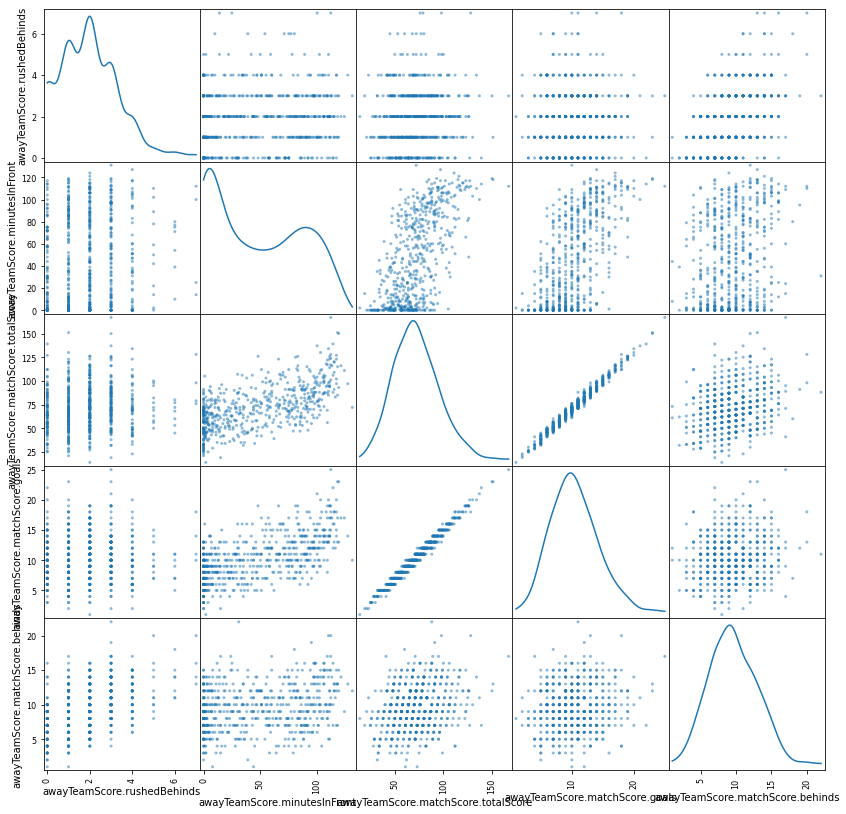

In [9]:
scatter_matrix(df_all[df_all.iloc[:,50:56].columns], diagonal='kde', figsize=(14,14));

In [10]:
# HTGDIFF: Home Team Goal Difference
# ATGDIFF: Away Team Goal Difference

df_all['HTGDIFF'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']
df_all['ATGDIFF'] = df_all['awayTeamScore.matchScore.goals'] - df_all['homeTeamScore.matchScore.goals']

## Calculate AVG goal difference for home and away team rolling 4 Games

In [11]:
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(4).mean()
        df_team[avg_h_a_diff] = result
        avg_per_team[t] = df_team
    return avg_per_team

In [12]:
d_AVGFTHG = avg_goal_diff(df_all, 'AVGHTGDIFF', 'match.homeTeam.name', 'H')

In [13]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = pd.concat([df,v])
    return df

In [14]:
df_AVGFTHG = from_dict_value_to_df(d_AVGFTHG)
df_AVGFTHG.sort_index(inplace=True)

In [15]:
d_AVGFTAG = avg_goal_diff(df_AVGFTHG, 'AVGATGDIFF', 'match.awayTeam.name', 'A')
df_all = from_dict_value_to_df(d_AVGFTAG)
df_all.sort_index(inplace=True)
df_all['AVGATGDIFF'].fillna(0, inplace=True)

## Add per match game results from last three games

In [16]:
df_all['goal_diff'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']


for index, row in df_all[df_all['match.status']=='CONCLUDED'].iterrows():
    if df_all['goal_diff'][index] > 0:
        df_all.at[index,'result'] = 3   # 3 is a win
    elif df_all['goal_diff'][index] == 0:
        df_all.at[index,'result'] = 2  # 2 is a draw
    else:
        df_all.at[index,'result'] = 1  # 1 is a result 

In [17]:
df_all.head()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGATGDIFF,goal_diff,result
0,Carlton Vs Richmond,2019-03-21 08:25:00,CONCLUDED,CD_M20190140101,CD_V40,2019-03-21T08:25:00,CD_T30,CD_T120,CD_R201901401,2019-03-21T19:25:00,...,1,1,4,1,-5,5,0.0,0.0,-5,1.0
1,Collingwood Vs Geelong Cats,2019-03-22 08:50:00,CONCLUDED,CD_M20190140102,CD_V40,2019-03-22T08:50:00,CD_T40,CD_T70,CD_R201901401,2019-03-22T19:50:00,...,1,0,3,0,-1,1,0.0,0.0,-1,1.0
2,Melbourne Vs Port Adelaide,2019-03-23 02:45:00,CONCLUDED,CD_M20190140103,CD_V40,2019-03-23T02:45:00,CD_T90,CD_T110,CD_R201901401,2019-03-23T13:45:00,...,0,2,2,0,-3,3,0.0,0.0,-3,1.0
3,Adelaide Crows Vs Hawthorn,2019-03-23 05:35:00,CONCLUDED,CD_M20190140104,CD_V6,2019-03-23T05:35:00,CD_T10,CD_T80,CD_R201901401,2019-03-23T16:05:00,...,0,0,2,0,-5,5,0.0,0.0,-5,1.0
4,Western Bulldogs Vs Sydney Swans,2019-03-23 08:25:00,CONCLUDED,CD_M20190140105,CD_V190,2019-03-23T08:25:00,CD_T140,CD_T160,CD_R201901401,2019-03-23T19:25:00,...,0,3,1,0,2,-2,0.0,0.0,2,3.0


In [18]:
def previous_data(df, h_or_a_team, column, letter, past_n):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, past_n):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}_{}'.format(letter, column, i)] = d[i].result
    return team_with_past_dict

In [19]:
def previous_data_call(df, side, column, letter, iterations):
    d = previous_data(df, side, column, letter, iterations)
    df_result= from_dict_value_to_df(d)
    df_result.sort_index(inplace=True)
    return df_result

In [20]:
df_last_home_results = previous_data_call(df_all, 'match.homeTeam.name', 'result', 'H', 3)
df_last_away_results = previous_data_call(df_last_home_results, 'match.awayTeam.name', 'result', 'A', 3)

In [21]:
df_last_last_HTGDIFF_results = previous_data_call(df_last_away_results, 'match.homeTeam.name', 'HTGDIFF', 'H', 3)
df_last_last_ATGDIFF_results = previous_data_call(df_last_last_HTGDIFF_results, 'match.awayTeam.name', 'ATGDIFF', 'A', 3)

In [22]:
df_last_AVGFTHG_results = previous_data_call(df_last_last_ATGDIFF_results, 'match.homeTeam.name', 'AVGHTGDIFF', 'H', 2)
df_last_AVGFTAG_results = previous_data_call(df_last_AVGFTHG_results, 'match.awayTeam.name', 'AVGATGDIFF', 'A', 2)

In [23]:
df_all = df_last_AVGFTAG_results.copy()

In [24]:
df_all.shape

(581, 91)

In [25]:
df_all

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,H_result_1,H_result_2,A_result_1,A_result_2,H_HTGDIFF_1,H_HTGDIFF_2,A_ATGDIFF_1,A_ATGDIFF_2,H_AVGHTGDIFF_1,A_AVGATGDIFF_1
0,Carlton Vs Richmond,2019-03-21 08:25:00,CONCLUDED,CD_M20190140101,CD_V40,2019-03-21T08:25:00,CD_T30,CD_T120,CD_R201901401,2019-03-21T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Collingwood Vs Geelong Cats,2019-03-22 08:50:00,CONCLUDED,CD_M20190140102,CD_V40,2019-03-22T08:50:00,CD_T40,CD_T70,CD_R201901401,2019-03-22T19:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Melbourne Vs Port Adelaide,2019-03-23 02:45:00,CONCLUDED,CD_M20190140103,CD_V40,2019-03-23T02:45:00,CD_T90,CD_T110,CD_R201901401,2019-03-23T13:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adelaide Crows Vs Hawthorn,2019-03-23 05:35:00,CONCLUDED,CD_M20190140104,CD_V6,2019-03-23T05:35:00,CD_T10,CD_T80,CD_R201901401,2019-03-23T16:05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Western Bulldogs Vs Sydney Swans,2019-03-23 08:25:00,CONCLUDED,CD_M20190140105,CD_V190,2019-03-23T08:25:00,CD_T140,CD_T160,CD_R201901401,2019-03-23T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Melbourne Vs Western Bulldogs,2022-03-16 08:10:00,CONCLUDED,CD_M20220140101,CD_V40,2022-03-16T08:10:00,CD_T90,CD_T140,CD_R202201401,2022-03-16T19:10:00,...,3.0,3.0,3.0,1.0,11.0,13.0,-11.0,11.0,8.75,-1.0
577,Carlton Vs Richmond,2022-03-17 08:25:00,CONCLUDED,CD_M20220140102,CD_V40,2022-03-17T08:25:00,CD_T30,CD_T120,CD_R202201401,2022-03-17T19:25:00,...,1.0,1.0,3.0,3.0,-1.0,-3.0,-6.0,-1.0,-4.00,-3.5
578,St Kilda Vs Collingwood,2022-03-18 08:50:00,CONCLUDED,CD_M20220140103,CD_V190,2022-03-18T08:50:00,CD_T130,CD_T40,CD_R202201401,2022-03-18T19:50:00,...,3.0,3.0,3.0,3.0,11.0,4.0,-7.0,-14.0,1.75,-7.0
579,Geelong Cats Vs Essendon,2022-03-19 03:10:00,CONCLUDED,CD_M20220140104,CD_V40,2022-03-19T03:10:00,CD_T70,CD_T50,CD_R202201401,2022-03-19T14:10:00,...,3.0,2.0,3.0,1.0,5.0,0.0,-9.0,10.0,0.50,1.5


In [26]:
df_matches_numeric = df_all._get_numeric_data()


In [27]:
df_matches_numeric.columns

Index(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'venue.capacity',
       'venue.groundDimension', 'venue.latitude', 'venue.longitude',
       'round.year', 'round.roundNumber', 'scoreWorm', 'scoreMap',
       'homeTeamScore.rushedBehinds', 'homeTeamScore.minutesInFront',
       'homeTeamScore.matchScore.totalScore', 'homeTeamScore.matchScore.goals',
       'homeTeamScore.matchScore.behinds',
       'homeTeamScore.matchScore.superGoals', 'awayTeamScore.rushedBehinds',
       'awayTeamScore.minutesInFront', 'awayTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.goals', 'awayTeamScore.matchScore.behinds',
       'awayTeamScore.matchScore.superGoals', 'weather.tempInCelsius',
       'homeTeamScoreChart.goals', 'homeTeamScoreChart.leftBehinds',
       'homeTeamScoreChart.rightBehinds', 'homeTeamScoreChart.leftPosters',
       'homeTeamScoreChart.rightPosters', 'homeTeamScoreChart.rushedBehinds',
       'homeTeamScoreChart.touchedBehinds', 'awayTeamScoreChart.go

In [28]:
#df_matches_numeric.drop(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'goal_diff', 'result', 'homeTeamScore.matchScore.goals', 'awayTeamScore.matchScore.goals'], axis=1, inplace=True)


df_matches_numeric = df_matches_numeric[['HTGDIFF','ATGDIFF','awayTeamScore.minutesInFront','homeTeamScore.minutesInFront','homeTeamScoreChart.goals','homeTeamScore.matchScore.totalScore','awayTeamScore.matchScore.totalScore','AVGHTGDIFF','round.year','awayTeamScoreChart.goals','H_HTGDIFF_1']]








df_matches_numeric.isnull().sum(axis = 0)

HTGDIFF                                 0
ATGDIFF                                 0
awayTeamScore.minutesInFront            0
homeTeamScore.minutesInFront            0
homeTeamScoreChart.goals                0
homeTeamScore.matchScore.totalScore     0
awayTeamScore.matchScore.totalScore     0
AVGHTGDIFF                              0
round.year                              0
awayTeamScoreChart.goals                0
H_HTGDIFF_1                            18
dtype: int64

In [29]:
df_norm = (df_matches_numeric - df_matches_numeric.min()) / (df_matches_numeric.max() - df_matches_numeric.min())

In [30]:
df_norm.columns

Index(['HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals', 'H_HTGDIFF_1'],
      dtype='object')

In [33]:
predictable_columns = [
       'HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals', 'H_HTGDIFF_1'
]

In [34]:
df_X = df_norm[predictable_columns]

In [35]:
df_X.fillna(0,inplace=True)

In [39]:
# Normal Rounds have 9 games
# Round 24 has 4 games
# Round 25 and 26 have 2 games
# Round 27 has 1 game

# + 9 per match day for normal rounds

int_for_test = len(df_all)
int_for_prediction = int_for_test - 9




In [40]:
df_all.shape

(581, 91)

In [41]:
X = df_X.iloc[:int_for_prediction,:]
print(X.shape)
Y = df_all.iloc[:int_for_prediction,:]['result']
print(Y.shape)
Z = df_X.iloc[int_for_prediction:,:]
print(Z.shape)

(572, 11)
(572,)
(9, 11)


In [42]:
Z

,HTGDIFF,ATGDIFF,awayTeamScore.minutesInFront,homeTeamScore.minutesInFront,homeTeamScoreChart.goals,homeTeamScore.matchScore.totalScore,awayTeamScore.matchScore.totalScore,AVGHTGDIFF,round.year,awayTeamScoreChart.goals,H_HTGDIFF_1
572,0.555556,0.444444,0.335878,0.468750,0.45,0.484375,0.424837,0.897436,0.666667,0.416667,0.722222
573,0.916667,0.083333,0.015267,0.929688,0.85,0.851562,0.183007,0.807692,0.666667,0.208333,0.666667
574,0.250000,0.750000,0.923664,0.000000,0.20,0.226562,0.666667,0.756410,0.666667,0.666667,0.750000
575,0.861111,0.138889,0.251908,0.664062,0.95,0.968750,0.339869,1.000000,0.666667,0.375000,0.916667
576,0.638889,0.361111,0.221374,0.664062,0.60,0.632812,0.372549,0.948718,1.000000,0.416667,0.861111
577,0.638889,0.361111,0.496183,0.328125,0.60,0.664062,0.405229,0.448718,1.000000,0.416667,0.527778
578,0.472222,0.527778,0.893130,0.039062,0.50,0.539062,0.575163,0.628205,1.000000,0.583333,0.861111
579,0.805556,0.194444,0.000000,0.976562,0.90,0.953125,0.379085,0.756410,1.000000,0.416667,0.694444
580,0.444444,0.555556,0.389313,0.500000,0.55,0.593750,0.640523,0.474359,1.000000,0.666667,0.722222


In [43]:
df_next_games_teams = df_all.iloc[int_for_prediction:,:][['match.homeTeam.name', 'match.awayTeam.name']]
print(df_next_games_teams.shape)

(9, 2)


In [44]:
df_next_games_teams

,match.homeTeam.name,match.awayTeam.name
572,Brisbane Lions,Western Bulldogs
573,Melbourne,Geelong Cats
574,Port Adelaide,Western Bulldogs
575,Melbourne,Western Bulldogs
576,Melbourne,Western Bulldogs
577,Carlton,Richmond
578,St Kilda,Collingwood
579,Geelong Cats,Essendon
580,GWS Giants,Sydney Swans


In [45]:
X.to_pickle("pickle_files/X.pkl")
Y.to_pickle("pickle_files/Y.pkl")
Z.to_pickle("pickle_files/Z.pkl")
df_next_games_teams.to_pickle("pickle_files/next_games.pkl")

In [46]:
df_all[['match.name','result']].tail(9)

,match.name,result
572,Brisbane Lions Vs Western Bulldogs,2.0
573,Melbourne Vs Geelong Cats,3.0
574,Port Adelaide Vs Western Bulldogs,1.0
575,Melbourne Vs Western Bulldogs,3.0
576,Melbourne Vs Western Bulldogs,3.0
577,Carlton Vs Richmond,3.0
578,St Kilda Vs Collingwood,1.0
579,Geelong Cats Vs Essendon,3.0
580,GWS Giants Vs Sydney Swans,1.0


In [47]:
df_next_games_teams

,match.homeTeam.name,match.awayTeam.name
572,Brisbane Lions,Western Bulldogs
573,Melbourne,Geelong Cats
574,Port Adelaide,Western Bulldogs
575,Melbourne,Western Bulldogs
576,Melbourne,Western Bulldogs
577,Carlton,Richmond
578,St Kilda,Collingwood
579,Geelong Cats,Essendon
580,GWS Giants,Sydney Swans


In [48]:
Z.columns

Index(['HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals', 'H_HTGDIFF_1'],
      dtype='object')

In [49]:
# how to make Z for test data

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,H_result_1,H_result_2,A_result_1,A_result_2,H_HTGDIFF_1,H_HTGDIFF_2,A_ATGDIFF_1,A_ATGDIFF_2,H_AVGHTGDIFF_1,A_AVGATGDIFF_1
0,Carlton Vs Richmond,2019-03-21 08:25:00,CONCLUDED,CD_M20190140101,CD_V40,2019-03-21T08:25:00,CD_T30,CD_T120,CD_R201901401,2019-03-21T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Collingwood Vs Geelong Cats,2019-03-22 08:50:00,CONCLUDED,CD_M20190140102,CD_V40,2019-03-22T08:50:00,CD_T40,CD_T70,CD_R201901401,2019-03-22T19:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Melbourne Vs Port Adelaide,2019-03-23 02:45:00,CONCLUDED,CD_M20190140103,CD_V40,2019-03-23T02:45:00,CD_T90,CD_T110,CD_R201901401,2019-03-23T13:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adelaide Crows Vs Hawthorn,2019-03-23 05:35:00,CONCLUDED,CD_M20190140104,CD_V6,2019-03-23T05:35:00,CD_T10,CD_T80,CD_R201901401,2019-03-23T16:05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Western Bulldogs Vs Sydney Swans,2019-03-23 08:25:00,CONCLUDED,CD_M20190140105,CD_V190,2019-03-23T08:25:00,CD_T140,CD_T160,CD_R201901401,2019-03-23T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Melbourne Vs Western Bulldogs,2022-03-16 08:10:00,CONCLUDED,CD_M20220140101,CD_V40,2022-03-16T08:10:00,CD_T90,CD_T140,CD_R202201401,2022-03-16T19:10:00,...,3.0,3.0,3.0,1.0,11.0,13.0,-11.0,11.0,8.75,-1.0
577,Carlton Vs Richmond,2022-03-17 08:25:00,CONCLUDED,CD_M20220140102,CD_V40,2022-03-17T08:25:00,CD_T30,CD_T120,CD_R202201401,2022-03-17T19:25:00,...,1.0,1.0,3.0,3.0,-1.0,-3.0,-6.0,-1.0,-4.00,-3.5
578,St Kilda Vs Collingwood,2022-03-18 08:50:00,CONCLUDED,CD_M20220140103,CD_V190,2022-03-18T08:50:00,CD_T130,CD_T40,CD_R202201401,2022-03-18T19:50:00,...,3.0,3.0,3.0,3.0,11.0,4.0,-7.0,-14.0,1.75,-7.0
579,Geelong Cats Vs Essendon,2022-03-19 03:10:00,CONCLUDED,CD_M20220140104,CD_V40,2022-03-19T03:10:00,CD_T70,CD_T50,CD_R202201401,2022-03-19T14:10:00,...,3.0,2.0,3.0,1.0,5.0,0.0,-9.0,10.0,0.50,1.5


In [50]:
df_test.columns

Index(['id', 'providerId', 'utcStartTime', 'status', 'compSeason.id',
       'compSeason.providerId', 'compSeason.name', 'compSeason.shortName',
       'compSeason.currentRoundNumber', 'round.id', 'round.providerId',
       'round.abbreviation', 'round.name', 'round.roundNumber', 'round.byes',
       'home.team.id', 'home.team.providerId', 'home.team.name',
       'home.team.abbreviation', 'home.team.nickname', 'home.team.teamType',
       'home.team.club.id', 'home.team.club.providerId', 'home.team.club.name',
       'home.team.club.abbreviation', 'home.team.club.nickname',
       'home.score.goals', 'home.score.behinds', 'home.score.totalScore',
       'home.score.superGoals', 'away.team.id', 'away.team.providerId',
       'away.team.name', 'away.team.abbreviation', 'away.team.nickname',
       'away.team.teamType', 'away.team.club.id', 'away.team.club.providerId',
       'away.team.club.name', 'away.team.club.abbreviation',
       'away.team.club.nickname', 'away.score.goals', 'away